In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import json
import numpy as np

In [2]:
def extractData(df):
    train, test = train_test_split(df, test_size=0.2, stratify=df["Output"], shuffle=True)
    xTrain = train.drop(columns = ["Output"]).to_numpy()
    xTest = test.drop(columns = ["Output"]).to_numpy()
    yTrain = train["Output"].to_numpy()
    yTest = test["Output"].to_numpy()
    return xTrain, yTrain, xTest, yTest

In [3]:
file = open("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/Models/wordEmbeddings.json")
dict = json.load(file)

os.chdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/TotalAmountDataset")
datasets = os.listdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/TotalAmountDataset")

dfs = []
for file in datasets:
    df = pd.read_csv(file)
    dfs.append(df)

DF = pd.concat(dfs)

TAdropCols = []
for col in dict.keys():
    if DF[col].max()==0 and DF[col].min()==0:
        TAdropCols.append(col)
        TAdropCols.append(col+"_X")
        TAdropCols.append(col+"_Y")

DF.drop(columns=TAdropCols, inplace=True)

In [4]:
file = open("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/Models/TAVocab.json")
TAVocab = json.load(file)
print("TA : ", sum(TAVocab.values()))

TA :  555


In [5]:
os.chdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/TotalAmountDataset")
datasetDir = os.listdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/TotalAmountDataset")

In [6]:
dfs = []
for file in datasetDir:
    df = pd.read_csv(file)
    dfs.append(df)
data = pd.concat(dfs)
data.drop(columns=["Unnamed: 0.4", "Unnamed: 0.3","Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0", "text", "Similarity", "Class", "CandidatePosition"], inplace=True)
data.drop(columns=TAdropCols, inplace=True)

data

,x1,y1,x2,y2,invoice,invoice_X,invoice_Y,order,order_X,order_Y,...,karl,karl_X,karl_Y,strech,strech_X,strech_Y,formal,formal_X,formal_Y,Output
0,0.665906,0.847581,0.697834,0.857661,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.927309,0.797984,0.958666,0.807661,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.554162,0.847581,0.590650,0.857661,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.924458,0.847581,0.960946,0.857661,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
0,0.581176,0.659817,0.646275,0.668379,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.855184,0.266267,0.931021,0.276256,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.855184,0.281963,0.931021,0.291667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
0,0.480451,0.376390,0.530431,0.384374,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.029322,0.287183,0.000855,-0.013554,0.253124,0.000855,0.000000,0.000000,0.000000,0
1,0.892785,0.376390,0.943571,0.384374,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.029322,0.699919,0.000855,-0.013554,0.665861,0.000855,0.000000,0.000000,0.000000,0


In [7]:
data.drop_duplicates(keep="first", inplace=True)
data.reset_index(inplace=True)
data.drop(columns=["index"], inplace=True)
data

,x1,y1,x2,y2,invoice,invoice_X,invoice_Y,order,order_X,order_Y,...,karl,karl_X,karl_Y,strech,strech_X,strech_Y,formal,formal_X,formal_Y,Output
0,0.665906,0.847581,0.697834,0.857661,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.927309,0.797984,0.958666,0.807661,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.554162,0.847581,0.590650,0.857661,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.924458,0.847581,0.960946,0.857661,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.581176,0.659817,0.646275,0.668379,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.855184,0.266267,0.931021,0.276256,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
177,0.855184,0.281963,0.931021,0.291667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
178,0.480451,0.376390,0.530431,0.384374,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.029322,0.287183,0.000855,-0.013554,0.253124,0.000855,0.000000,0.000000,0.000000,0
179,0.892785,0.376390,0.943571,0.384374,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.029322,0.699919,0.000855,-0.013554,0.665861,0.000855,0.000000,0.000000,0.000000,0


In [8]:
data.isna().sum().sum()

0

In [9]:
data["Output"] = pd.to_numeric(data["Output"], errors='coerce')

In [10]:
file = open("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/Models/wordEmbeddings.json")
dict = json.load(file)
cols = dict.keys()
cols

dict_keys(['invoice', 'pitstop', 'order', 'id', 'service', 'date', 'delivery', 'registration', 'number', 'renault', 'pulse', 'diesel', 'odometer', 'from', 'to', 'cars', 'care', 'opp', 'trident', 'hyundai', 'showroom', 'kudlu', 'gate', 'hosur', 'main', 'road', 'bengaluru', 'gst', 'bumper', 'bracket', 'front', 'ac', 'repair', 'evaporator', 'cleaning', 'painting', 'charges', 'full', 'body', 'page', 'tax', 'enterprises', 'no', 'dated', 'near', 'rotery', 'community', 'center', 'dec', 'vikas', 'nagar', 'bundi', 'raj', 'note', 'of', 'payment', 'state', 'name', 'rajasthan', 'code', 'reference', 'other', 'references', 'dt', 'buyer', 'bill', 'tally', 'solutions', 'private', 'limited', 'amr', 'tech', 'park', 'ii', 'hongasandra', 'dispatch', 'doc', 'banglore', 'dispatched', 'through', 'destination', 'karnataka', 'terms', 'si', 'description', 'goods', 'quantity', 'rate', 'per', 'amount', 're', 'om', 'bussiness', 'promotional', 'activity', 'influencer', 'event', 'igst', 'total', 'chargeable', 'in', 

In [12]:
corrs = {}
for col in cols:
    if col in data.columns:
        c = data[col].corr(data["Output"])
        corrs[col] = abs(c)

corrs = sorted(corrs.items(), key=lambda x:x[1], reverse=True)

corrs

[('description', 0.328051454260316),
 ('total', 0.26986594478447984),
 ('net', 0.18785745301219647),
 ('per', 0.17899874467503454),
 ('quantity', 0.1714668701935295),
 ('goods', 0.1714668701935289),
 ('amr', 0.16426896936871482),
 ('park', 0.16426896936871463),
 ('your', 0.1642689693687143),
 ('only', 0.1604687272045271),
 ('no', 0.1520307821872351),
 ('hundred', 0.15129716783772623),
 ('account', 0.15103181632763896),
 ('code', 0.1493428954516803),
 ('item', 0.1493428954516803),
 ('of', 0.14867119527480097),
 ('thousand', 0.14221012681363157),
 ('vat', 0.1320734039760973),
 ('international', 0.1290646612423762),
 ('si', 0.1290646612423759),
 ('india', 0.12906466124237587),
 ('qty', 0.12788959865613211),
 ('place', 0.1191487665543736),
 ('version', 0.11914876655437359),
 ('pe', 0.11583259807015278),
 ('det', 0.11583259807015277),
 ('compressor', 0.11583259807015271),
 ('rere', 0.1158325980701527),
 ('bangaior', 0.11583259807015264),
 ('freight', 0.11583259807015261),
 ('totals', 0.1158

In [13]:
len(data[data["Output"]==1])

53

In [14]:
len(data[data["Output"]==0])

128

In [15]:
xTrain, yTrain, xTest, yTest = extractData(data)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(xTrain, yTrain)

In [16]:
X_train_resampled.shape

(204, 1669)

In [17]:
len(y_train_resampled[y_train_resampled==1])

102

In [18]:
len(y_train_resampled[y_train_resampled==0])

102

In [19]:
len(yTest[yTest==1])

11

In [20]:
len(yTest[yTest==0])

26

In [55]:
xgb = XGBClassifier(objective = "binary:hinge", eval_metric = "error", n_estimators = 500, max_depth = 10, num_parallel_tree = 5, learning_rate = 0.4)
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=5,
              objective='binary:hinge', predictor=None, ...)

In [56]:
pred = xgb.predict(xTest)

In [57]:
cm = confusion_matrix(pred, yTest)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
totalP = TP+FP
totalN = TN+FN
total = totalP+totalN

acc = (TP+TN)/(totalN+totalP)
acc*=100

p = TP/(TP+FP)
r = TP/(TP+FN)
f1 = (2*p*r)/(p+r)

print("Total : ", total, "\n")
print("True +ve :  ", TP, "     ", "{:.2f}".format((TP/totalP)*100), "%")
print("True -ve :  ", TN, "     " ,"{:.2f}".format((TN/totalN)*100), "%")
print("False +ve : ", FP, "      ", "{:.2f}".format((FP/totalP)*100), "%")
print("False -ve   ", FN, "      ", "{:.2f}".format((FN/totalN)*100), "%")
print("\n")
print("Accuracy :  ", "{:.2f}".format(acc), "%")
print("\n")
print("F1 Score :  ", "{:.2f}".format(f1), "%")


Total :  37 

True +ve :   21       80.77 %
True -ve :   4       36.36 %
False +ve :  5        19.23 %
False -ve    7        63.64 %


Accuracy :   67.57 %


F1 Score :   0.78 %


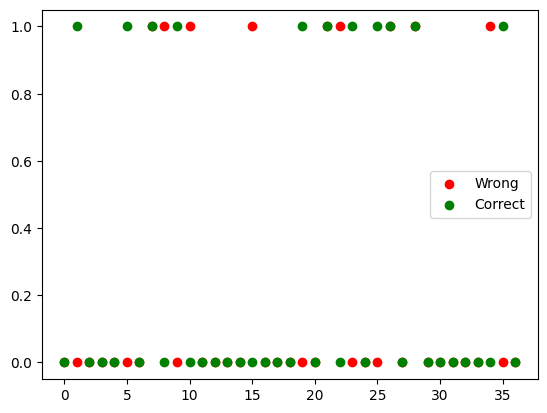

In [58]:
x = [x for x in range(len(xTest))]
plt.scatter(x, pred, color="red")
plt.scatter(x, yTest, color="green")
plt.legend(["Wrong", "Correct"])
plt.show()

In [59]:
params = {
    "n_estimators" : [400, 500, 600],
    "max_depth" : [8, 9, 10, 11, 12],
    "learning_rate" : [0.07, 0.09, 0.1, 0.3, 0.5],
    "num_parallel_tree" : [5, 7, 9],
    "reg_alpha" : [1.3, 1.5, 1.7, 1.9],
    "reg_lambda" : [1.3, 1.5, 1.7, 1.9]
}

# params = {
#     "n_estimators" : [500],
#     "max_depth" : [5, 10, 15],
#     "learning_rate" : [0.06, 0.07, 0.08, 0.09],
#     "num_parallel_tree" : [4, 5, 6],
#     "reg_alpha" : [1.3, 1.5, 1.7],
#     "reg_lambda" : [1.3, 1.5, 1.7]
# }

# params = {
#     "n_estimators" : [500],
#     "max_depth" : [10],
#     "learning_rate" : [0.09],
#     "num_parallel_tree" : [5],
#     "reg_alpha" : [1.3],
#     "reg_lambda" : [1.9]
# }

In [60]:
gridXGB = RandomizedSearchCV(xgb, params, n_jobs=-1, scoring="f1", n_iter=10, cv=5)
gridXGB.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='error',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_r...
                                           monotone_constraints=None,
                                           n_estimators=500, n_jobs=None,
                                           num_parallel_tree=5,
                                           objective='binary:hinge',
                                           predictor=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.09, 0.1, 0.3,
                                                          0.5],
                                        'max_depth': [8, 9, 10, 11, 12],
                                        'n_estimators': [400, 500, 600],
                                        'num_parallel_tree': [5, 7, 9],
                                        'reg_alpha': [1.3, 1.5, 1.7, 1.9],
                                        'reg_lambda': [1.3, 1.5, 1.7, 1.9]},
                   scoring='f1')

In [61]:
bestParams = gridXGB.best_params_
bestParams

{'reg_lambda': 1.9,
 'reg_alpha': 1.9,
 'num_parallel_tree': 5,
 'n_estimators': 400,
 'max_depth': 9,
 'learning_rate': 0.5}

In [62]:
bestModel = gridXGB.best_estimator_

In [63]:
yPred = bestModel.predict(xTest)

In [64]:
cm = confusion_matrix(yPred, yTest)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
totalP = TP+FP
totalN = TN+FN
total = totalN + totalP

acc = (TP+TN)/(totalN+totalP)
acc*=100

p = TP/(TP+FP)
r = TP/(TP+FN)
f1 = (2*p*r)/(p+r)

print("Total : ", total, "\n")
print("True +ve :  ", TP, "     ", "{:.2f}".format((TP/totalP)*100), "%")
print("True -ve :  ", TN, "     " ,"{:.2f}".format((TN/totalN)*100), "%")
print("False +ve : ", FP, "      ", "{:.2f}".format((FP/totalP)*100), "%")
print("False -ve   ", FN, "      ", "{:.2f}".format((FN/totalN)*100), "%")
print("\n")
print("Accuracy :  ", "{:.2f}".format(acc), "%")
print("\n")
print("F1 Score :  ", "{:.2f}".format(f1))



Total :  37 

True +ve :   24       92.31 %
True -ve :   4       36.36 %
False +ve :  2        7.69 %
False -ve    7        63.64 %


Accuracy :   75.68 %


F1 Score :   0.84


In [65]:
bestModel.save_model("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Models/XGBoostModelTA")